In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow 
import keras
from tensorflow.keras.datasets import fashion_mnist

In [2]:
mnist = keras.datasets.fashion_mnist

In [3]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [4]:
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag',
              
              'Ankle boot']

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [8]:
x_train = x_train/255.
x_test = x_test/255.

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [11]:
from tensorflow.keras.layers  import Conv2D,Dense,Flatten,MaxPooling2D
from tensorflow.keras.models import Sequential

In [12]:
model = Sequential()
model.add(Conv2D(
    filters=32,
    kernel_size=(3,3),
    strides=(1, 1),
    padding="valid",
    activation='relu',
    input_shape=(28,28,1)
    
))

model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(units=300,kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(units=200,kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(units=100,kernel_initializer='he_uniform', activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
Total params: 1,703,320
Trainable params: 1,703,320
Non-trainable params: 0
______________________________________________

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model_history = model.fit(x_train,y_train, batch_size=64, epochs=20)

Epoch 1/20
938/938 [==============================] - 81s 81ms/step - loss: 0.6549 - accuracy: 0.78801s - loss: 0.659
Epoch 2/20
938/938 [==============================] - 37s 40ms/step - loss: 0.2741 - accuracy: 0.90100s - loss: 0.2742 - accura
Epoch 3/20
938/938 [==============================] - 36s 38ms/step - loss: 0.2150 - accuracy: 0.9214
Epoch 4/20
938/938 [==============================] - 39s 42ms/step - loss: 0.1810 - accuracy: 0.9333
Epoch 5/20
938/938 [==============================] - 31s 33ms/step - loss: 0.1520 - accuracy: 0.9434
Epoch 6/20
938/938 [==============================] - 36s 38ms/step - loss: 0.1268 - accuracy: 0.9534
Epoch 7/20
938/938 [==============================] - 32s 34ms/step - loss: 0.1019 - accuracy: 0.9621
Epoch 8/20
938/938 [==============================] - 31s 33ms/step - loss: 0.0847 - accuracy: 0.9684
Epoch 9/20
938/938 [==============================] - 31s 33ms/step - loss: 0.0724 - accuracy: 0.9726
Epoch 10/20
938/938 [===================

In [16]:
model.evaluate(x_train,y_train)


1875/1875 [==============================] - 10s 5ms/step - loss: 0.0207 - accuracy: 0.9927


[0.02068498730659485, 0.9927166700363159]

In [17]:
y_pred = model.predict(x_test)
y_pred = (y_pred>0.5)

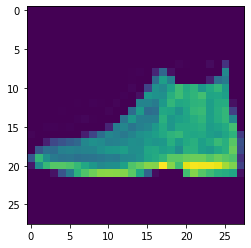

In [29]:
plt.imshow(x_test[0])

In [22]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets